In [121]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution, plot_bloch_multivector
from qiskit_aer import AerSimulator

In [122]:
# Define a simple function f(x)
def f(x):
    return x % 2  # Example: f(x) = x mod 2

In [123]:
# Create a quantum circuit with 4 qubits and 1 ancillary qubit for function evaluation
n_qubits = 4
n_measure_register = n_qubits
n_measure_fx = 1

InputQubits = QuantumRegister(n_qubits, name='inputQ') 
Y = QuantumRegister(1, name='y') 
Measure = ClassicalRegister(n_measure_register, name='measure')
MeasureFx = ClassicalRegister(n_measure_fx, name='measure_Fx')

# Create the quantum circuit
qc = QuantumCircuit(InputQubits, Y, Measure, MeasureFx)

# Apply Hadamard gate to input qubits
qc.h(range(n_qubits))

In [124]:
# Define the oracle as a separate circuit
oracle = QuantumCircuit(InputQubits, Y, name="    U_f(x)   ")
oracle.cx(0, n_qubits)  # The MSB (qubit Y) determines f(x)

In [125]:
# Append the oracle as a black-box circuit
qc.append(oracle.to_instruction(), range(n_qubits + 1))

In [126]:
# Measure all qubits
qc.barrier()
qc.measure(InputQubits,Measure)
qc.measure(Y,MeasureFx)

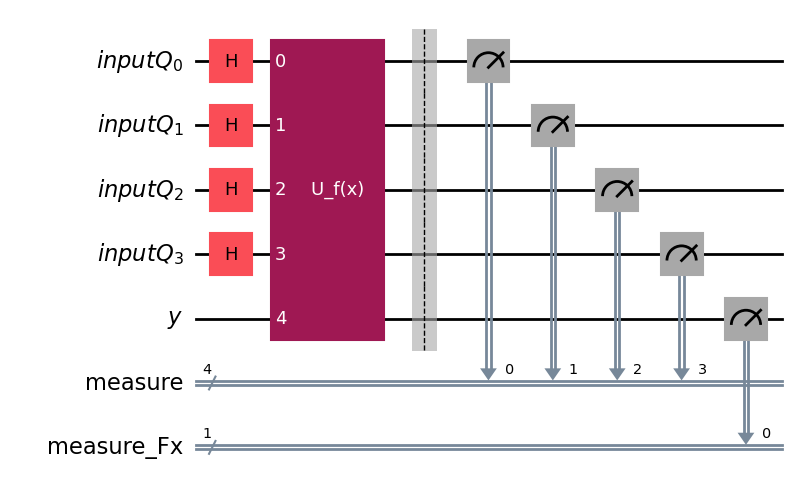

In [127]:
# Draw the circuit
qc.draw('mpl')

In [129]:
# Increase shots to reduce sampling variance
shots = 100000

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc.decompose(reps=1), shots= shots).result()
counts = result.get_counts()

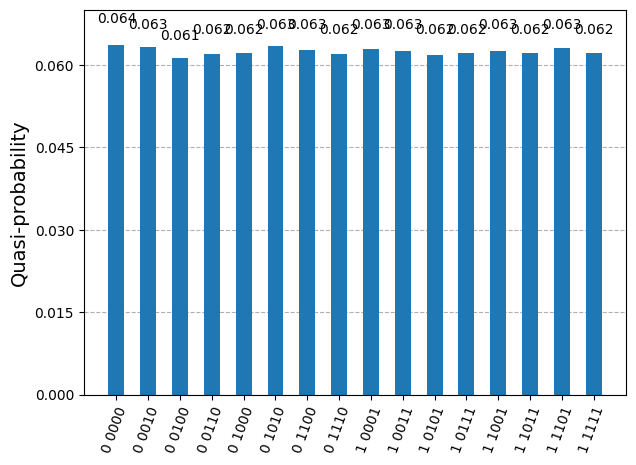

In [130]:
# Display the result
plot_distribution(counts)

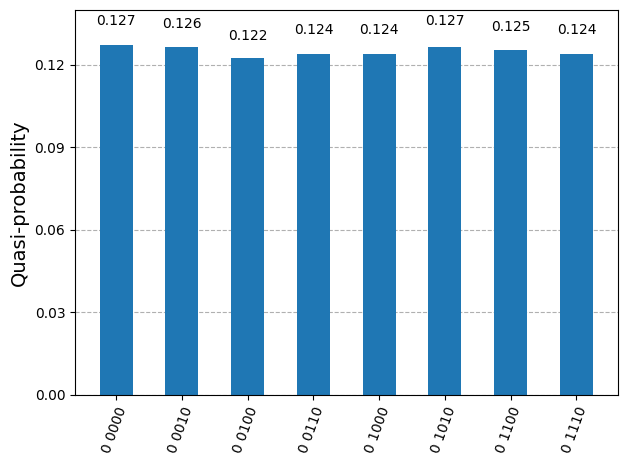

In [131]:
FxPar = {key: value for key, value in counts.items() if key.startswith('0')}
plot_distribution(FxPar)

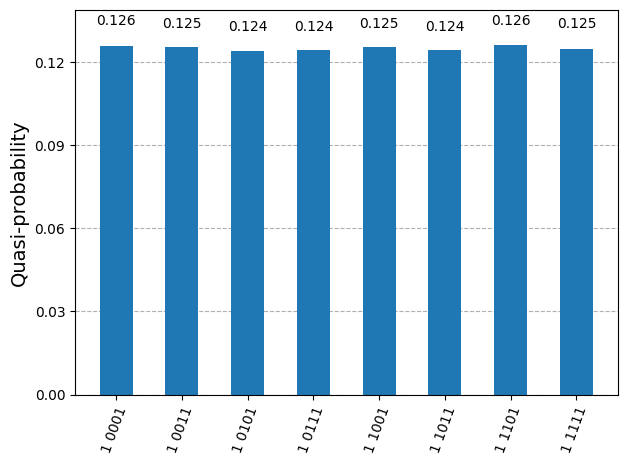

In [132]:
FxImPar = {key: value for key, value in counts.items() if key.startswith('1')}
plot_distribution(FxImPar)

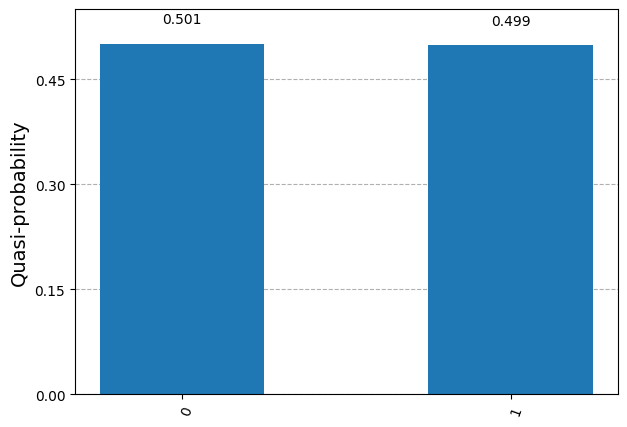

In [133]:
subcount = {}
subcount['0'] = counts['0 0000'] + counts['0 0010'] +  counts['0 0100'] + counts['0 0110'] + counts['0 1000'] + counts['0 1010'] + counts['0 1100'] +  counts['0 1110']
subcount['1'] = counts['1 0001'] + counts['1 0011'] +  counts['1 0101'] + counts['1 0111'] + counts['1 1001'] + counts['1 1011'] + counts['1 1101'] +  counts['1 1111']
plot_distribution(subcount)